# Project: Analyse TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), ranging from 1960 to 2015. It includes information about the movie, director, cast, user rating, revenue, etc.

The questions we're gonna aim to answer using the data:

- Question 1: What are the best and worst 10 movies of all time?
- Question 2: Which directors have more than one movie in the top 100?
- Question 3: How has the number of movies being made changed over the years?
- Question 4: Which month generates the most revenue?
- Question 5: How many movies were produced per genre?
- Question 6: What's the average movie runtime and how has it changed over the years?
- Question 7: How has the runtime changed over the years considering different movie genres? (Comedy & Drama) 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Let's load in the data and look at the first few rows to get a good feeling of it.

In [2]:
# Loading the data and looking at the first few rows
movies = pd.read_csv('tmdb-movies.csv')
movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


Now let's look at some useful info about the dataset to understand the different datatype in each column, the missing values, the range of each column, etc.

In [3]:
# now let's look at some details
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

By examining the dataset, we see a few potential problems. Some irrelevant columns to our analysis that should be dropped, some missing values(we're gonna treat 0 as a missing value for runtime, revenue, and budget), the release_date column isn't the right data type, check for duplicates, and some movies got very few votes which could lead to misleading results for some parts of our analysis. Let's address those problems. 

First of all, let's drop some columns that are irrelevant to the questions posed. 

In [5]:
# list of columns in our df
movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
# drop irrelevant columns
cols_to_drop = ['imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies']
movies.drop(cols_to_drop, axis=1, inplace=True)
movies.head(1)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


Now let's drop columns with missing values.Again, for the revenue, budget, and runtime columns we will treat 0 as a missing values.

In [7]:
# drop rows with obvious missing values
movies = movies.dropna()

In [8]:
# drop the not-so-obvious missing values
movies = movies[~((movies['budget'] == 0) | (movies['revenue'] == 0) | (movies['runtime'] == 0))]

Now let's check for duplicates and drop them if any are found

In [9]:
# check for duplicates
movies.duplicated().sum()

1

This means we have one duplicate row. Let's drop it.

In [10]:
# print the shape of movies
print(movies.shape)

# drop the duplicate row
movies.drop_duplicates(inplace=True)

# print the shape of movies now to check (should one less row)
print(movies.shape)

(3854, 14)
(3853, 14)


And now, we deal with the release_date column. It's currently stored as a string, but we want it to be a datetime object so we can easily extract the month of release for our analysis.

In [11]:
# convert release_date to a datetime object
movies['release_date'] = pd.to_datetime(movies['release_date'])

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: What are the best and worst 10 movies of all time?

To find the "best" and "worst" movies of all time, we have to define what best and worst are. For our case, we'll just use the *vote_average* coulmn, which is a number between 0 and 10 and represents the average of ratings given to a particular movie by users. And we'll use the number of votes as a tiebreaker. 

One thing worth noting is some movies recieved very few numbers of votes, which could be a little misleading if ignored. For the purpose of our analysis, we'll only consider movies that recieved more than a certain number of votes (I'll use the average number of votes but it could be anything). 

In [12]:
top_df = movies[movies['vote_count'] > movies['vote_count'].mean()]
print(movies.shape)
print(top_df.shape)

(3853, 14)
(1036, 14)


In [13]:
# let's find the 10 best movies
top_10 = top_df.sort_values(by=['vote_average', 'vote_count'], ascending=False)[['original_title', 'vote_average', 'vote_count', 'release_year', 'director', 'runtime']].head(10)

# and the 10 worst movies
worst_10 = top_df.sort_values(by=['vote_average', 'vote_count'])[['original_title', 'vote_average', 'vote_count', 'release_year', 'director', 'runtime']].head(10)

Let's visualise the top 10 movies!

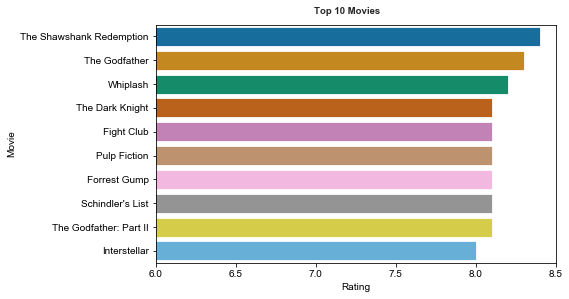

In [14]:
fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('white')
sns.set_context('paper')
ax = sns.barplot(x='vote_average', y='original_title', data=top_10, palette='colorblind', dodge=False)
ax.set(xlim=(6, 8.5))
plt.xlabel('Rating')
plt.ylabel('Movie')
fig.text(0.55, 1, 'Top 10 Movies', fontweight='bold')
plt.tight_layout()

The Shawshank Redemption, which is one of the most popular movies of all time, is top of our list.

Now let's look at the 10 worst movies.

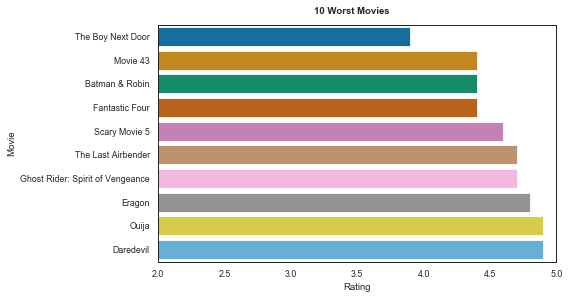

In [15]:
fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('white')
sns.set_context('paper')
ax = sns.barplot(x='vote_average', y='original_title', data=worst_10, palette='colorblind', dodge=False)
ax.set(xlim=(2, 5))
plt.xlabel('Rating')
plt.ylabel('Movie')
fig.text(0.55, 1, '10 Worst Movies', fontweight='bold')
plt.tight_layout()

### Question 2: Which directors have more than one movie in the top 100?

Next, let's get a list of directors who have more than one movie in the top 100 list. To do that, first we're gonna get the list of top 100 movies. We'll use the *top_df* in which we filtered by the number of votes to avoid any misleading results.

In [16]:
# Get the top 100
top_100 = top_df.sort_values(by=['vote_average', 'vote_count'], ascending=False)[['original_title', 'vote_average', 'vote_count', 'release_year', 'director', 'runtime']].head(100)
top_100.tail()

,original_title,vote_average,vote_count,release_year,director,runtime
7391,No Country for Old Men,7.6,1706,2007,Joel Coen|Ethan Coen,122
8973,The Big Lebowski,7.6,1696,1998,Joel Coen,117
6990,Million Dollar Baby,7.6,1355,2004,Clint Eastwood,132
683,Boyhood,7.6,1343,2014,Richard Linklater,164
8459,Trainspotting,7.6,1163,1996,Danny Boyle,93


We can see that some rows have multiple values for the director column spearated by '|'. We're gonna separate those and put each value in a different row so we can count both directors. 

We're gonna do that by defining a function that will:

- Turning the director columns into a list of directors using *split* and *tolist*

- Using Pandas *explode* method to get a different row for each value in the list

Note: We're defining it as a function because we'll need to do the same thing again with the genres column while answering later questions in our analysis.

In [17]:
# define a function to split columns with multiple values separated by "|"
def split_and_explode(df, col):
    """
    Takes as input a dataframe "df" and a column inside the dataframe "col"
    Returns a dataframe with the values inside the column split into separate rows
    instead of being in one row and separated by "|"
    """
    # turn the column into a list instead of a string separated by |
    df[col] = df[col].str.split('|').tolist()
    
    # put each value in the list in a separate row
    df = df.explode(col)
    
    # reutrn the final df
    return df

In [18]:
# create a df of the directors for the top 100
direct_100 = top_100[['original_title', 'director']]

# print the shape before
print(direct_100.shape)

# separate the director into different rows
direct_100 = split_and_explode(direct_100, 'director')

# print the shape after to check
print(direct_100.shape)

(100, 2)
(106, 2)


C:\Users\MOHAMMED\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Ok the shape indicates that everything is working as we expect, great! Now let's get a list of directors who appeared more than once in this list and plot it. 

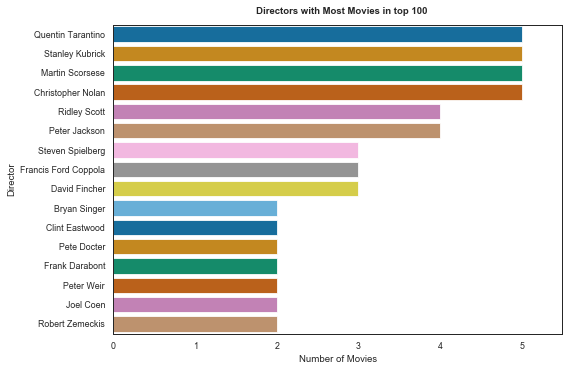

In [19]:
# directors who appeared more than once in the top 100
more_than_once = direct_100['director'].value_counts()[direct_100['director'].value_counts() > 1]

# plot
fig, ax = plt.subplots(figsize=(8,5))
sns.set_style("white")
sns.set_context('paper')
ax = sns.barplot(x=more_than_once.values, y=more_than_once.index, palette="colorblind", dodge=False)
ax.set(xlim=(0, 5.5))
plt.xlabel('Number of Movies')
plt.ylabel('Director')
fig.text(0.45, 1, 'Directors with Most Movies in top 100', fontweight='bold')
plt.tight_layout()

We can see that Kubrick, Nolan, Tarantino, and Scorsese are the ones with the most movies in the top 100 (each with 5). All four of them are incredibly successful and popular directors and our findings confirm that.

### Question 3: How has the number of movies being made changed over the years?

When I try to pick a movie to watch nowadays, it always feels like there are endless options. Everyone loves movies, the cinema industry is one of the most important industries there is. So it surely seems like the number of movies being produced each year is increasing as time goes by. Let's look at the data to examine that.

In [20]:
num_by_year = movies['release_year'].value_counts().sort_index(ascending=False)

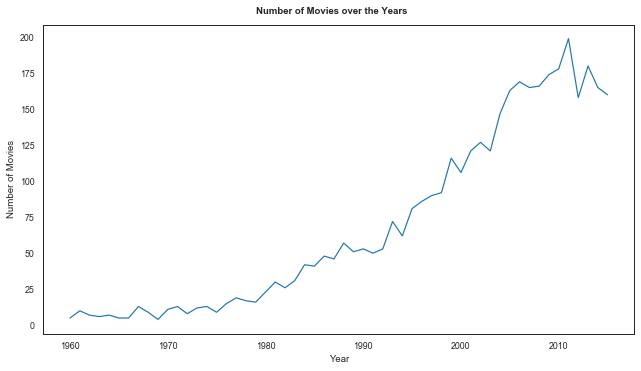

In [21]:
fig, ax = plt.subplots(figsize=(9,5))
sns.set_style("white")
sns.set_context('paper')
ax = sns.lineplot(x=num_by_year.index, y=num_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
fig.text(0.4, 1, 'Number of Movies over the Years', fontweight='bold')
plt.tight_layout()

## Question 4: Which month generates the most revenue?

Now let's look the revenue generated by movies released in different months. To do that we're going to:

- Create a new attribute, the *release_month*, extracted from the *release_date*
- Use groupby and sum to find the total *revenue_adj* for movies released in each month.

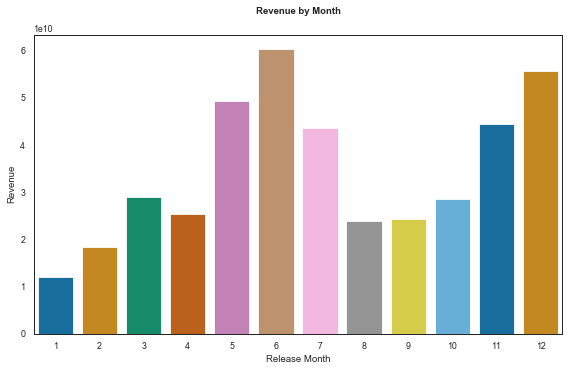

In [22]:
# Create a copy of the movies df in case something goes wrong
by_month = movies.copy()

# add the new release_month column
by_month['release_month'] = by_month['release_date'].dt.month

# now we group by the month and find the total revenue_adj
rev_per_month = pd.DataFrame(by_month.groupby('release_month')['revenue'].sum()).reset_index()

# and plot
fig, ax = plt.subplots(figsize=(8,5))
sns.set_style("white")
sns.set_context('paper')
ax = sns.barplot(x='release_month', y='revenue', data=rev_per_month, palette="colorblind", dodge=False)
plt.xlabel('Release Month')
plt.ylabel('Revenue')
fig.text(0.45, 1, 'Revenue by Month', fontweight='bold')
plt.tight_layout()

So we can see that June, the first month of the summer,  is the month with the most revenue generated followed by December (something to do with holidays probably).

It could be interesting to investigate this further and look at it in more details, it could be that a few movies are responsible for most of the revenue because it's a well-known fact amongst the cinema community that the summer is the period when blockbusters are usually released and those tend to get more revenue than other movies.

We could also examine the number of movies being released each month and see whether it follows a similar pattern.

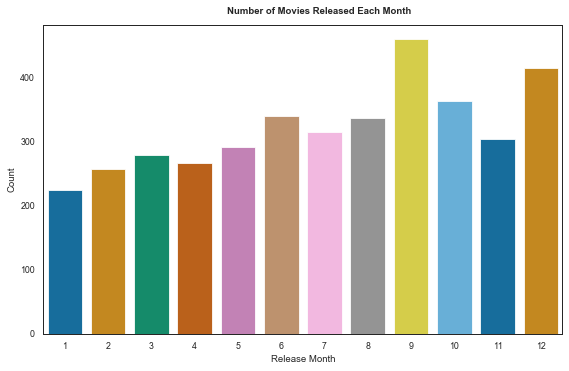

In [23]:
count_by_month = by_month.groupby('release_month')['id'].count()

# and plot
fig, ax = plt.subplots(figsize=(8,5))
sns.set_style("white")
sns.set_context('paper')
ax = sns.barplot(x=count_by_month.index, y=count_by_month.values, palette="colorblind", dodge=False)
plt.xlabel('Release Month')
plt.ylabel('Count')
fig.text(0.4, 1, 'Number of Movies Released Each Month', fontweight='bold')
plt.tight_layout()

Interestingly, September is the month with the biggest number of movies but also one of the lowest when looking at revenue generated. This would be an interesting point to investigate further in a different analysis

## Question 5: How many movies were produced per genre?

Well the question is pretty self-explanatory, so let's get to work. To do that we first need to deal with the fact that one movie can have more than one genre. We're gonna create a dateframe with the genres separated for each movie instead of just a long string with '|' between the genres. 

We're gonna use the same function *split_and_explode()* we defined while working with the directors column earlier.

- Turn the genres columns into a list of genres using *split* and *tolist*

- Using Pandas *explode* method to get a different row for each value in the list

In [24]:
# create a new df in case something goes wrong 
gen_df = movies.copy()

# print the shape before
print(gen_df.shape)

# separate the genres into different rows
gen_df = split_and_explode(gen_df, 'genres')

# print the shape after to check
print(gen_df.shape)

(3853, 14)
(10299, 14)


Now let's plot the number of movies per genre.

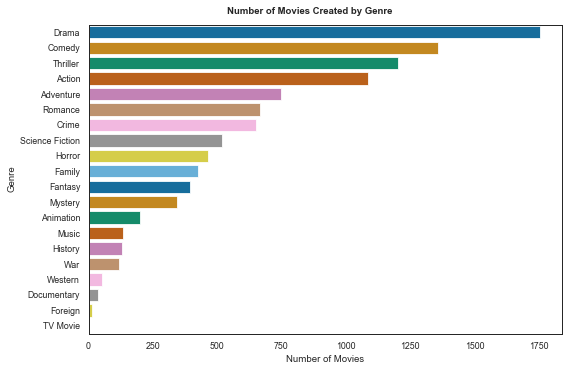

In [25]:
movies_per_genre = gen_df['genres'].value_counts()

# and plot
fig, ax = plt.subplots(figsize=(8,5))
sns.set_style("white")
sns.set_context('paper')
ax = sns.barplot(x=movies_per_genre.values, y=movies_per_genre.index, palette="colorblind", dodge=False)
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
fig.text(0.4, 1, 'Number of Movies Created by Genre', fontweight='bold')
plt.tight_layout()

Drama and Comedy are the top two genres when it comes to the number of movies being made.

## Question 6: What's the average movie runtime and how has it changed over the years?

"That's **two hours** of my life I'm not getting back" is probably a phrase you hear a lot when people are complaining about a movie they didn't like. But what's the actual average runtime of a movie? Is it really two hours? And has it always been "two hours" or did people in the 70's use a different phrase to complain about movies they hated? We're gonna try to answer that with the data we have at hand.

Let's plot a histogram of the runtimes of all movies in our dataset.

Text(0.5, 0, 'Runtime of Movies')

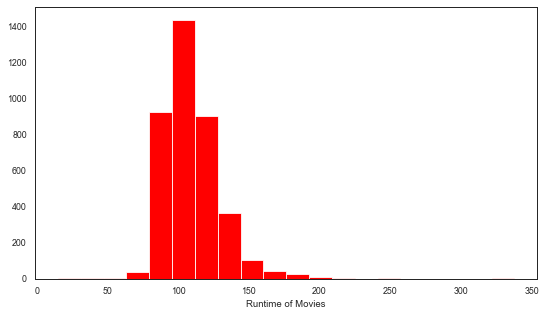

In [26]:
fig, ax = plt.subplots(figsize=(9,5))
ax = plt.hist(movies['runtime'], bins=20, facecolor='r')
plt.xlabel('Runtime of Movies')

From this figure we can see that the average runtime is around 110 minutes. And there are a few really long movies. 

Ok, so maybe all those people complaining didn't lose exactly two hours. But it's pretty close. But has it always been this way? Let's look at how movies runtime has changed over the years next.

Text(0.5, 1.0, 'Change in Average Runtime of Movies Over the Years')

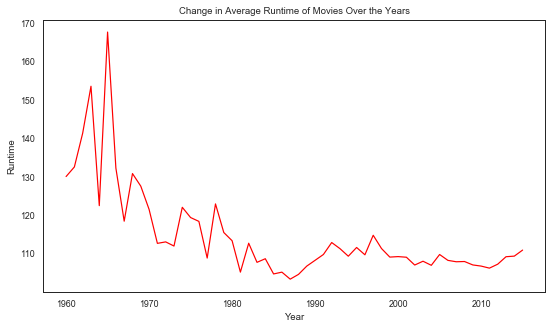

In [27]:
time_by_year = movies.groupby('release_year')['runtime'].mean()

fig, ax = plt.subplots(figsize=(9,5))
ax = time_by_year.plot(color='red')
plt.xlabel('Year')
plt.ylabel('Runtime')
plt.title('Change in Average Runtime of Movies Over the Years')

It looks like the general trend is that movies are getting shorter.If you're looking for a short movie maybe start looking for a movie made in the 80's.

## Question 7: How has the runtime changed over the years considering different movie genres? (Comedy & Drama)

Do different movie genres have different runtime? Earlier we found out that comedy and drama are the most common genres, We're gonna look at how those two differ when it comes to runtime.

This could be expanded to include more genres, but we're just gonna examine those two to make the plots easier to understand.

We're gonna use the *gen_df* we created earlier to calculate the average runtime for comedy and drama movies over the years to see how they changed.

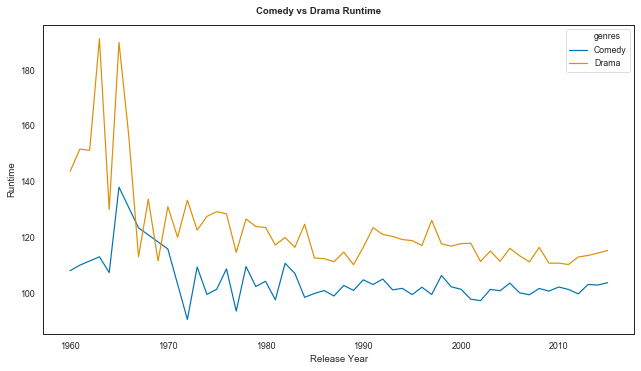

In [28]:
runtime_gen_yr = pd.DataFrame(gen_df.groupby(['release_year', 'genres'])['runtime'].mean()).reset_index()
genres_to_consider = ['Drama', 'Comedy']
runtime_gen_yr_consider = runtime_gen_yr[runtime_gen_yr['genres'].isin(genres_to_consider)]


fig, ax = plt.subplots(figsize=(9,5))
sns.set_style("white")
sns.set_context('paper')
ax = sns.lineplot(x="release_year", y="runtime", hue='genres', data=runtime_gen_yr_consider, palette="colorblind")
#ax.set(xlim=(6, 8.5))
plt.xlabel('Release Year')
plt.ylabel('Runtime')
fig.text(0.4, 1, 'Comedy vs Drama Runtime', fontweight='bold')
plt.tight_layout()

Both of them seem to follow the same general trend, they're getting shorter. But what's interesting is that drama movies used to be much longer than comedy movies, but in recent years the difference has shrunk.

<a id='conclusions'></a>
## Conclusions

The data set was used to answer a number of posed questions at the beginning and in order to do that, we first started by cleaning the data set.

Some columns irrlevant to our analysis were dropped like: 

- imdb id
- cast
- homepage
- tagline
- keywords
- overview
- production companies

I then dropped the missing values (for revenue, budget, runtime 0 was treated as a missing value), and did the same with duplicate rows. I also changed the release date column to a datetime object to help with our analysis.

For some of the questions posed I needed to expand the genres and directors column to account for movies with more than one genre or more than one director. 

#### Question 1: What are the best and worst 10 movies of all time?
I only accounted for movies that got more than a certain number of votes. And I found that according to the user ratings, the top 10 movies were:

1. The Shawshank Redemption	
2. The Godfather
3. Whiplash
4. The Dark Knight
5. Fight Club	
6. Pulp Fiction
7. Forrest Gump
8. Schindler's List
9. The Godfather: Part II
10. Interstellar

And the worst 10 movies were:

1. The Boy Next Door
2. Movie 43
3. Batman & Robin
4. Fantastic Four
5. Scary Movie 5
6. The Last Airbender
7. Ghost Rider: Spirit of Vengeance
8. Eragon
9. Ouija
10. Daredevil

#### Question 2: Which directors have more than one movie in the top 100?
There were a number of directors with more than one movie in the top 100, the ones with the most movies in the top 100 with 5 movies each were:
1. Stanley Kubrick
2. Chirstopher Nolan 
3. Quentin Tarantino
4. Martin Scorsese 

#### Question 3: How has the number of movies being made changed over the years?

According to the data in this data set, the general trend is that the number of movies being produced is getting bigger, with its peak around 2011. 

#### Question 4: Which month generates the most revenue?
According to our data, June is the month with the most revenue generated by movies followed closely by December. December is also the month with most movies released. 

On the other hand, January was the month with the least revenue generated.

It would be interesting to investigate this further and account for the 'blockbusters effect', because a lot of those commercially successful movies are typically released in the summer and around the holidays, so they could be the ones driving the revenues up for those months.

#### Question 5: How many movies were produced per genre?

I looked at the number of movies produced per genre, and it looks like Drama, Comedy, and Thirller are our top 3 genres with 1755, 1357, and 1204 movies respectively. 

#### Question 6: What's the average movie runtime and how has it changed over the years?

I looked at the average movie runtime and found out it's approximately 109 minutes. But that hasn't always been the case. I also examined how the average runtime of movies changed over the years and found that the general trend is that movies on average are getting shorter with them being longest around the mid 60's and shortest during the mid 80's.

#### Question 7: How has the runtime changed over the years considering different movie genres? (Comedy & Drama)

I then compared the two genres with most movies (Drama and Comedy) when it comes to their runtimes over the years. I found that both of them follow the same general trend in which they're also getting shorter.

Drama movies tend to be longer than comedy movies, but the difference isn't as big as it's used to be with the difference being much smaller in recent years than it was in say the early 60's.

It would be interesting to investigate this further to try and find out why this is the case.

### Limitations

- There were lots of missing values in the budget and revenue columns so I had to drop all of those which affected the size of the data set.
- Budget and revenue don't have a currency unit and it wasn't clear whether the revenue columns shows the global revenues or not, so I had to be very careful analysing those.
- Some movies had very user few votes so I had to leave them out when analysing the ratings.
-  It would've been interesting to analyse the effect of the Covid-19 pandemic on the film industry but the data isn't up to date, it only contains data about movies up to 2015. 